In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Set the path to the base folder containing the "ml-latest-small" folder.
# Adjust the path as needed.
path = '/home/sergio/Desktop/DataScienceHW/example_kaggle/les_7'

# Build paths to the MovieLens CSV files
ml_path = os.path.join(path, 'ml-latest-small')
ratings_file = os.path.join(ml_path, 'ratings.csv')
movies_file = os.path.join(ml_path, 'movies.csv')


In [10]:
# Load the datasets
ratings_df = pd.read_csv(ratings_file)
movies_df = pd.read_csv(movies_file)

print("Ratings DataFrame shape:", ratings_df.shape)
print("Movies DataFrame shape:", movies_df.shape)
print(ratings_df.head())
print(movies_df.head())


Ratings DataFrame shape: (100836, 4)
Movies DataFrame shape: (9742, 3)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [11]:

# --- Create Y (ratings) and R (indicator) matrices ---
# We need to build a matrix where each row is a movie and each column is a user.
# First, extract unique movieIds and userIds.
unique_movies = movies_df['movieId'].unique()
unique_users = ratings_df['userId'].unique()
m = len(unique_movies)  # number of movies
n = len(unique_users)   # number of users

# Create mappings for movieId and userId to indices in our matrices
movieId_to_index = {movieId: i for i, movieId in enumerate(unique_movies)}
userId_to_index = {userId: j for j, userId in enumerate(unique_users)}

# Initialize Y and R matrices with zeros
Y = np.zeros((m, n))
R = np.zeros((m, n))

# Fill in Y and R from ratings_df
for _, row in ratings_df.iterrows():
    movie_idx = movieId_to_index[row['movieId']]
    user_idx = userId_to_index[row['userId']]
    Y[movie_idx, user_idx] = row['rating']
    R[movie_idx, user_idx] = 1  # Mark that this rating exists

print("Rating matrix Y shape:", Y.shape)
print("Indicator matrix R shape:", R.shape)


Rating matrix Y shape: (9742, 610)
Indicator matrix R shape: (9742, 610)


In [12]:

# --- Function to normalize ratings (if needed) ---
def normalizeRating(Y, R):
    m, n = Y.shape
    Ymean = np.zeros((m, 1))
    Ynorm = np.zeros(Y.shape)
    for i in range(m):
        idx = R[i, :] == 1
        if np.sum(idx) > 0:
            Ymean[i] = np.mean(Y[i, idx])
            Ynorm[i, idx] = Y[i, idx] - Ymean[i]
    return Ynorm, Ymean

# --- Function to load movie names from movies.csv ---
def loadMovieList():
    # movies_df was loaded earlier. Here we extract the titles.
    movieNames = movies_df.sort_values('movieId')['title'].tolist()
    return movieNames


Number of movies: 9742
First movie: Toy Story (1995)
Average rating for movie 1601 (American Tail: Fievel Goes West, An (1991)): 0.11 / 5


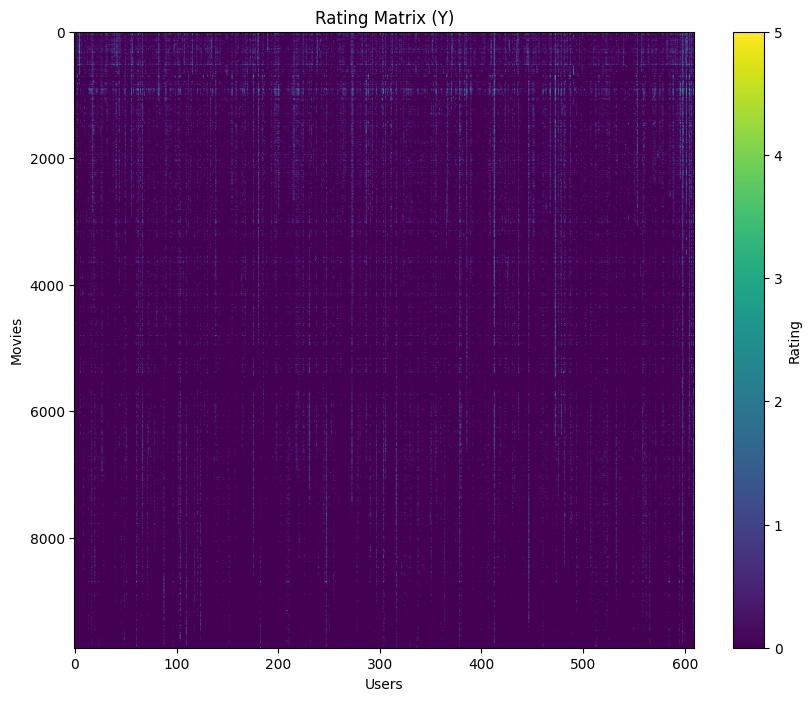

In [13]:

# Load the movie list and print the number of movies and the first movie's title.
names = loadMovieList()
print("Number of movies:", len(names))
print("First movie:", names[0])

# --- Example: Print average rating for the first movie (after normalization, if desired) ---
# For example, for the movie at index 0 (which may be 'Toy Story' if the ordering fits).
if np.sum(R[0, :]) > 0:
    avg_rating = np.mean(Y[1600, R[0, :] == 1])
    print("Average rating for movie 1601 (%s): %.2f / 5" % (names[1600], avg_rating))
else:
    print("No ratings for movie 1.")

# --- Visualize the rating matrix ---
plt.figure(figsize=(10, 8))
plt.imshow(Y, aspect='auto', cmap='viridis')
plt.colorbar(label='Rating')
plt.ylabel('Movies')
plt.xlabel('Users')
plt.title('Rating Matrix (Y)')
plt.show()
